In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-price-usd/main.csv


In [4]:
from tqdm.notebook import tqdm

In [5]:
df = pd.read_csv("/kaggle/input/bitcoin-price-usd/main.csv")

In [6]:
df.shape

(188317, 11)

In [7]:
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,1609459200000,28923.63,28961.66,28913.12,28961.66,27.457032,1609459259999,7.943820e+05,1292,16.777195,485390.826825
1,1609459260000,28961.67,29017.50,28961.01,29009.91,58.477501,1609459319999,1.695803e+06,1651,33.733818,978176.468202
2,1609459320000,29009.54,29016.71,28973.58,28989.30,42.470329,1609459379999,1.231359e+06,986,13.247444,384076.854453
3,1609459380000,28989.68,28999.85,28972.33,28982.69,30.360677,1609459439999,8.800168e+05,959,9.456028,274083.075142
4,1609459440000,28982.67,28995.93,28971.80,28975.65,24.124339,1609459499999,6.992262e+05,726,6.814644,197519.374888


In [8]:
df["shifted_close"] = df["Close"].shift(-4)

In [40]:
df.isnull().sum()

Open Time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close Time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
shifted_close                   4
dtype: int64

In [9]:
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,shifted_close
0,1609459200000,28923.63,28961.66,28913.12,28961.66,27.457032,1609459259999,7.943820e+05,1292,16.777195,485390.826825,28975.65
1,1609459260000,28961.67,29017.50,28961.01,29009.91,58.477501,1609459319999,1.695803e+06,1651,33.733818,978176.468202,28937.11
2,1609459320000,29009.54,29016.71,28973.58,28989.30,42.470329,1609459379999,1.231359e+06,986,13.247444,384076.854453,28943.87
3,1609459380000,28989.68,28999.85,28972.33,28982.69,30.360677,1609459439999,8.800168e+05,959,9.456028,274083.075142,28934.84
4,1609459440000,28982.67,28995.93,28971.80,28975.65,24.124339,1609459499999,6.992262e+05,726,6.814644,197519.374888,28900.00


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
std_data = scaler.fit_transform(df)

df = pd.DataFrame(std_data, columns=df.columns)

In [12]:
df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,shifted_close
188312,0.999979,0.800794,0.796959,0.803033,0.799945,0.022805,0.999979,0.023384,0.040975,0.012988,0.015820,0.798991
188313,0.999984,0.799909,0.796131,0.802534,0.799847,0.018322,0.999984,0.018780,0.037581,0.013541,0.016487,NaN
188314,0.999989,0.799693,0.796507,0.802299,0.799532,0.016183,0.999989,0.016586,0.032746,0.011068,0.013475,NaN
188315,0.999995,0.799497,0.795399,0.800708,0.799010,0.024294,0.999995,0.024882,0.053456,0.010696,0.013012,NaN
188316,1.000000,0.798974,0.795556,0.801679,0.798991,0.007589,1.000000,0.007775,0.025031,0.006145,0.007478,NaN


In [13]:
df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,shifted_close
188312,0.999979,0.800794,0.796959,0.803033,0.799945,0.022805,0.999979,0.023384,0.040975,0.012988,0.015820,0.798991
188313,0.999984,0.799909,0.796131,0.802534,0.799847,0.018322,0.999984,0.018780,0.037581,0.013541,0.016487,NaN
188314,0.999989,0.799693,0.796507,0.802299,0.799532,0.016183,0.999989,0.016586,0.032746,0.011068,0.013475,NaN
188315,0.999995,0.799497,0.795399,0.800708,0.799010,0.024294,0.999995,0.024882,0.053456,0.010696,0.013012,NaN
188316,1.000000,0.798974,0.795556,0.801679,0.798991,0.007589,1.000000,0.007775,0.025031,0.006145,0.007478,NaN


In [14]:
df.iloc[:4, :-1]

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,0.000000,0.018647,0.005471,0.021423,0.019861,0.014707,0.000000,0.007587,0.044301,0.014224,0.008717
1,0.000005,0.019687,0.007018,0.022733,0.021180,0.031323,0.000005,0.016197,0.056611,0.028600,0.017567
2,0.000011,0.020996,0.006996,0.023077,0.020616,0.022749,0.000011,0.011761,0.033809,0.011231,0.006897
3,0.000016,0.020453,0.006529,0.023043,0.020436,0.016262,0.000016,0.008405,0.032883,0.008017,0.004922


In [15]:
df.iloc[0, -1]

0.020243115390789934

In [16]:
arr = df.to_numpy()

In [17]:
arr[:4, :-1]

array([[0.00000000e+00, 1.86465088e-02, 5.47052530e-03, 2.14229615e-02,
        1.98605042e-02, 1.47069782e-02, 0.00000000e+00, 7.58733541e-03,
        4.43011933e-02, 1.42240630e-02, 8.71688998e-03],
       [5.29327383e-06, 1.96870457e-02, 7.01777817e-03, 2.27330361e-02,
        2.11800890e-02, 3.13226621e-02, 5.29327383e-06, 1.61970244e-02,
        5.66108901e-02, 2.86002489e-02, 1.75665797e-02],
       [1.05865477e-05, 2.09964700e-02, 6.99588831e-03, 2.30768999e-02,
        2.06164280e-02, 2.27486425e-02, 1.05865477e-05, 1.17610053e-02,
        3.38088054e-02, 1.12314650e-02, 6.89744325e-03],
       [1.58798215e-05, 2.04532244e-02, 6.52871991e-03, 2.30427050e-02,
        2.04356517e-02, 1.62622754e-02, 1.58798215e-05, 8.40525337e-03,
        3.28830064e-02, 8.01702180e-03, 4.92212023e-03]])

In [18]:
X = []
y = []
max_i = len(arr)

for i, ligne in enumerate(arr):
    if i+4 < max_i:    
        X.append(arr[i:i+4, :-1])
        y.append(arr[i, -1])

X = np.array(X)
y = np.array(y)

In [19]:
X[-1].shape

(4, 11)

In [20]:
np.isnan(X).sum()

0

In [21]:
np.isnan(y).sum()

0

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [24]:
import tensorflow as tf

In [25]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.LSTM(units=50, return_sequences=True, activation='relu', input_shape=X[0].shape),
        tf.keras.layers.LSTM(units=100, return_sequences=False, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 50)             12400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 77901 (304.30 KB)
Trainable params: 77901 (304.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
4708/4708 [==============================] - 41s 8ms/step - loss: 9.8034e-04 - mae: 0.0054
Epoch 2/10
4708/4708 [==============================] - 38s 8ms/step - loss: 1.6352e-05 - mae: 0.0030
Epoch 3/10
4708/4708 [==============================] - 38s 8ms/step - loss: 1.4035e-05 - mae: 0.0028
Epoch 4/10
4708/4708 [==============================] - 38s 8ms/step - loss: 1.2911e-05 - mae: 0.0027
Epoch 5/10
4708/4708 [==============================] - 38s 8ms/step - loss: 1.1546e-05 - mae: 0.0025
Epoch 6/10
4708/4708 [==============================] - 38s 8ms/step - loss: 1.1033e-05 - mae: 0.0025
Epoch 7/10
4708/4708 [==============================] - 38s 8ms/step - loss: 1.0123e-05 - mae: 0.0024
Epoch 8/10
4708/4708 [==============================] - 38s 8ms/step - loss: 9.4134e-06 - mae: 0.0023
Epoch 9/10
4708/4708 [==============================] - 38s 8ms/step - loss: 8.8978e-06 - mae: 0.0022
Epoch 10/10
4708/4708 [==============================] - 38s 8ms/step - loss: 8.31

# Test

In [41]:
test_df = df.iloc[150650:-4]

In [42]:
X_test.shape

(37663, 4, 11)

In [43]:
test_df.shape

(37663, 12)

In [44]:
test_arr = scaler.inverse_transform(test_df)
y_true = test_arr[:,-1]

In [45]:
test_df["pred"] = model.predict(X_test)

1177/1177 [==============================] - 4s 3ms/step


/tmp/ipykernel_46/47310490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["pred"] = model.predict(X_test)


In [46]:
test_df.drop(["shifted_close"], axis=1, inplace=True)
predictions = scaler.inverse_transform(test_df)

/tmp/ipykernel_46/3984253238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(["shifted_close"], axis=1, inplace=True)


In [47]:
y_pred = predictions[:,-1]

In [48]:
import matplotlib.pyplot as plt

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
print("mea:", mean_absolute_error(y_true, y_pred))
print("rmse:", mean_squared_error(y_true, y_pred, squared=False))

mea: 60.531391411680154
rmse: 85.45825050784406


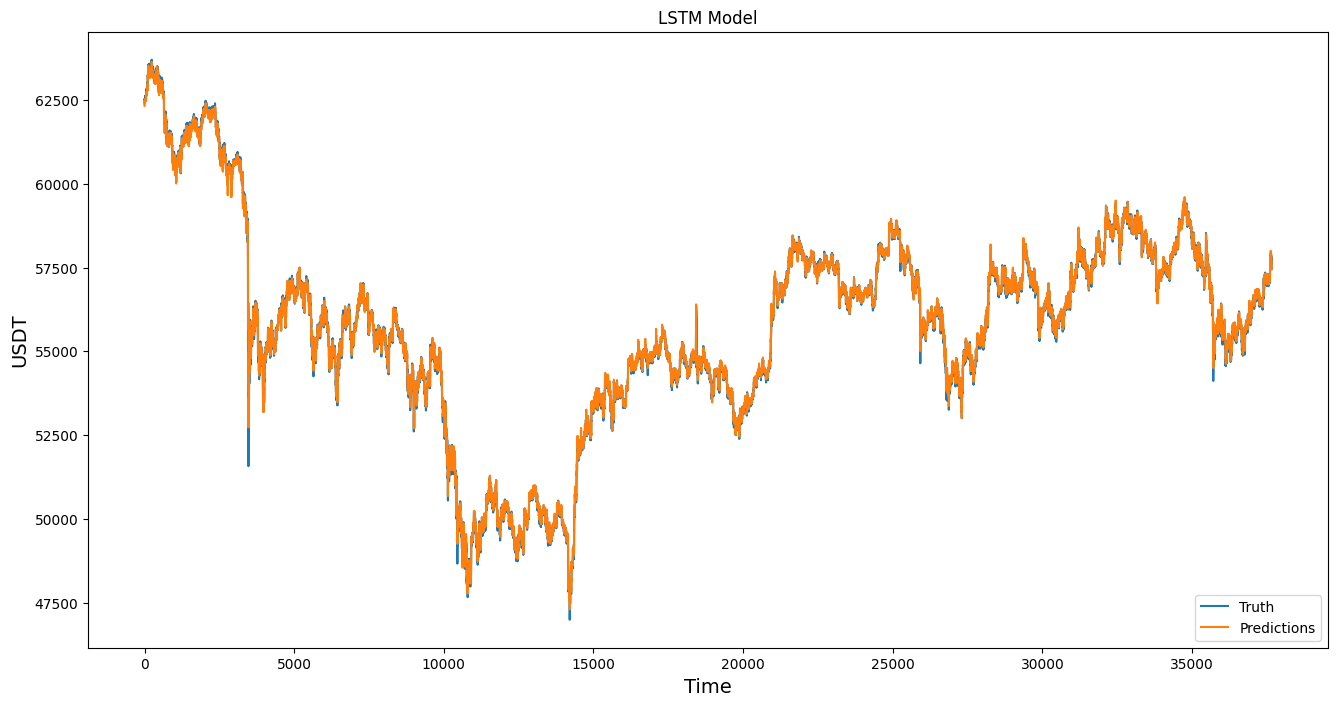

In [51]:
plt.figure(figsize=(16, 8))
plt.title("LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(["Truth", "Predictions"], loc="lower right")

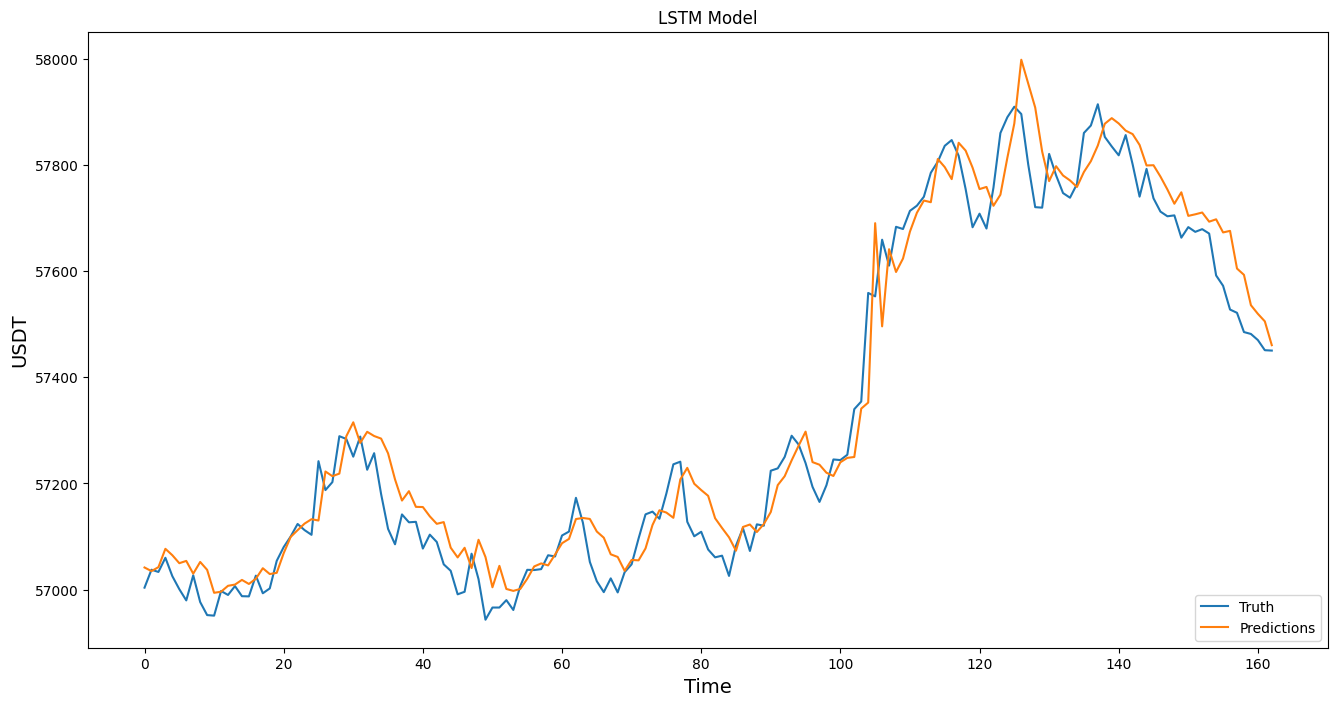

In [52]:
zoom = 37500
plt.figure(figsize=(16, 8))
plt.title("LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(y_true[zoom:])
plt.plot(y_pred[zoom:])
plt.legend(["Truth", "Predictions"], loc="lower right")